Vehicle Detection Model with OpenCV

In [1]:
# Import libraries required for this project
import os
import re
from os.path import isfile, join

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_frames = os.listdir('frames/')
model_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

model_images=[]
for i in model_frames:
    img = cv2.imread('frames/' + i)
    model_images.append(img)

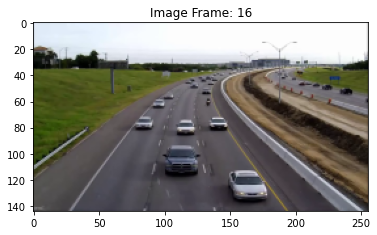

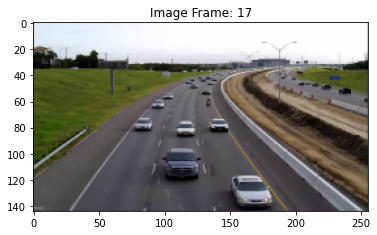

In [3]:
i = 16
for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(model_images[frame], cv2.COLOR_BGR2RGB))
    plt.title("Image Frame: " + str(frame))
    plt.show()

In [4]:

grayA = cv2.cvtColor(model_images[i], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(model_images[i+1], cv2.COLOR_BGR2GRAY)
diff_image = cv2.absdiff(grayB, grayA)
ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)    
len(valid_cntrs)

dmy = model_images[16].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))

array([[[188, 176, 169],
        [225, 213, 206],
        [225, 213, 206],
        ...,
        [230, 230, 230],
        [230, 230, 230],
        [190, 190, 190]],

       [[206, 194, 187],
        [247, 235, 228],
        [246, 234, 227],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [210, 210, 210]],

       [[206, 194, 187],
        [248, 236, 229],
        [247, 235, 228],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [210, 210, 210]],

       ...,

       [[ 90,  90,  90],
        [115, 114, 114],
        [124, 121, 122],
        ...,
        [ 56,  52,  53],
        [ 45,  45,  45],
        [ 36,  36,  36]],

       [[ 91,  91,  91],
        [115, 113, 114],
        [111, 109, 110],
        ...,
        [ 74,  69,  68],
        [ 57,  55,  56],
        [ 42,  40,  41]],

       [[ 62,  62,  62],
        [ 72,  71,  71],
        [ 70,  67,  68],
        ...,
        [ 75,  69,  68],
        [ 67,  64,  65],
        [ 48,  45,  46]]

In [6]:
kernel = np.ones((4,4),np.uint8)

font = cv2.FONT_HERSHEY_SIMPLEX

pathIn = "contour_frames/"

for i in range(len(model_images)-1):
    
    grayA = cv2.cvtColor(model_images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(model_images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
    
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
            if (y >= 90) & (cv2.contourArea(cntr) < 40):
                break
            valid_cntrs.append(cntr)
            
    dmy = model_images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
    cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
    cv2.imwrite(pathIn+str(i)+'.png',dmy)

In [7]:
pathOut = 'vehicle_detection_v3.mp4'
fps = 14.0

frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

In [8]:
files.sort(key=lambda f: int(re.sub('\D', '', f)))

for i in range(len(files)):
    filename=pathIn + files[i]
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    frame_array.append(img)

In [9]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    out.write(frame_array[i])
out.release()